In [1]:
import os
import glob
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
import imageio
import scipy.misc
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from utils_image import interpolate_image

In [19]:
# working directory of 'Spring2019-Proj3-grp1'
pwd = os.path.dirname(os.path.dirname(os.getcwd()))
# working directory of the images we need to scale
data_dir = os.path.join(pwd, 'data', 'test_set')
path_lr = glob.glob(os.path.join(data_dir, 'LR', '*.jpg'))
# set the working directory of output
checkpoint_wd = os.path.join(pwd, "output", "checkpoint")
# set the working directory of prediction
if not os.path.exists(os.path.join(pwd, "output", 'PRED')):
    os.makedirs(os.path.join(pwd, "output", 'PRED'))
names = [os.path.basename(path) for path in path_lr]
path_pred = [os.path.join(pwd, "output", 'PRED', name) for name in names]

### Load the low resolution image data

In [4]:
# Read the low resolution images
image_lr = []
for i in range(len(path_lr)):
    image_lr.append(imageio.imread(path_lr[i], as_gray=False, pilmode="RGB").astype(np.float32)/255.)
# scale the original low resolution images
image_lr_scaled = interpolate_image(image_lr)

### Creating the Prediction Model

In [5]:
# Placeholders
c_dim = 3
lr = tf.placeholder(tf.float32, [None, None, None, c_dim], name='lr')
hr = tf.placeholder(tf.float32, [None, None, None, c_dim], name='hr')
# Parameters
W1 = tf.Variable(tf.random_normal([9, 9, 3, 64], stddev=1e-3), name='W1')
b1 = tf.Variable(tf.zeros([64]), name='b1')
W2 = tf.Variable(tf.random_normal([1, 1, 64, 32], stddev=1e-3), name='W2')
b2 = tf.Variable(tf.zeros([32]), name='b2')
W3 = tf.Variable(tf.random_normal([5, 5, 32, 3], stddev=1e-3), name='W3')
b3 = tf.Variable(tf.zeros([1]), name='b3')

In [6]:
# patch extraction and representation
conv1 = tf.nn.relu(tf.nn.conv2d(lr, W1, strides=[1,1,1,1], padding='SAME') + b1)
# non-linear mapping
conv2 = tf.nn.relu(tf.nn.conv2d(conv1, W2, strides=[1,1,1,1], padding='SAME') + b2)
# reconstruction
hr_pred = tf.nn.sigmoid(tf.nn.conv2d(conv2, W3, strides=[1,1,1,1], padding='SAME') + b3)

In [7]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

### Prediction

In [8]:
image_hr_pred = []

In [9]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    if os.path.exists(os.path.join(checkpoint_wd, "model.ckpt.index")):
        saver.restore(sess, os.path.join(checkpoint_wd, "model.ckpt"))
        
    tic = time.clock()
    for i in range(len(image_lr_scaled)):
        image_hr_pred.append(np.squeeze(sess.run(hr_pred, feed_dict={lr:np.expand_dims(image_lr_scaled[i], axis=0)})))
    toc = time.clock()
    
    print(toc-tic)

INFO:tensorflow:Restoring parameters from C:\Users\sheng\OneDrive\CU Second Semester\Applied Data Science\Spring2019-Proj3-grp1\output\checkpoint\model.ckpt
48.995127699654255


In [20]:
for i in range(len(path_pred)):
    scipy.misc.imsave(path_pred[i], image_hr_pred[i])

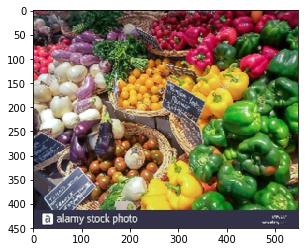

In [15]:
plt.imshow(image_hr_pred[69])

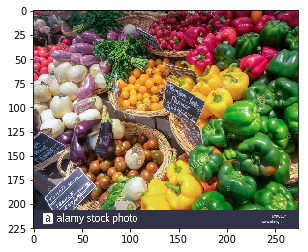

In [16]:
plt.imshow(image_lr[69])